# 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1, size=100)

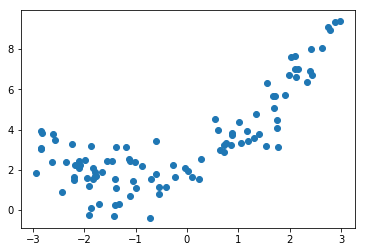

In [3]:
plt.scatter(x, y)

### 1. 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.5821497356094089

In [6]:
y_predict = lin_reg.predict(X)

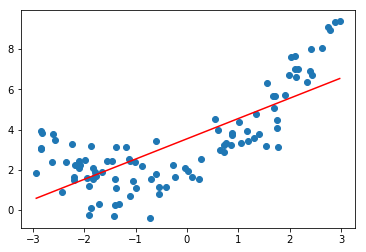

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

**使用均方误差来描述拟合程度**

In [9]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

2.1956789065378346

### 2. 使用多项式回归

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [11]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [12]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

0.7588348944780031

- **显然比线性回归拟合程度更高**

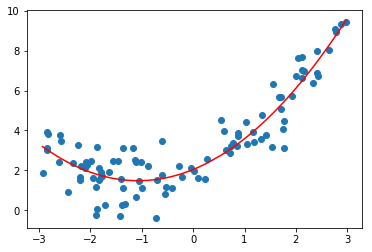

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')

- degree = 10

In [16]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

0.7089027479565608

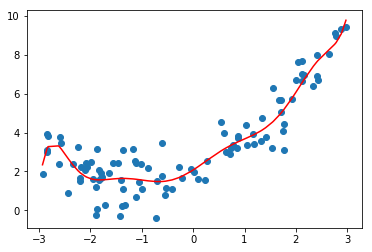

In [17]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')

- degree = 100

In [18]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.4228369185533294

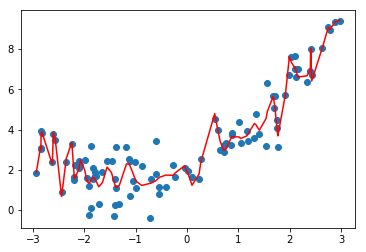

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

- 可以看出，随着degree的值越大，拟合的程度就越高
- 但是此时模型已经不能很好预测数据，称为过拟合

### 3. train-test-split的意义

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=333)

#### 线性回归

In [21]:
lin_reg  = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

1.7443456784533762

#### 多项式回归

In [23]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.6702537779194762

- 显然在degree=2时的模型的泛化能力强于线性回归

In [24]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.7699932063227523

In [25]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

4207629822333741.0

- 结合上面可以看出，degree越高，对训练数据拟合的越好，但是对测试数据集预测的能力越低
- 即模型的泛化能力越差

[![PR2.png](https://i.postimg.cc/SxJ8755v/PR2.png)](https://postimg.cc/nXfCndn4)

### 4. 学习曲线

- 随着学习的数据越多，对训练数据与测试数据的拟合程度的变化曲线

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [38]:
X_train.shape

(75, 1)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

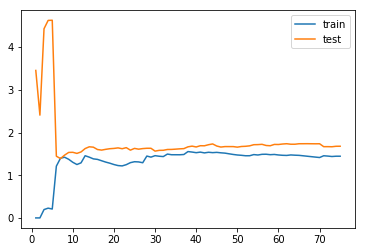

In [44]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()

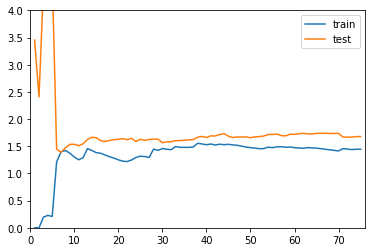

In [48]:
# 封装函数
def plot_learning_curve(algorithm, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algorithm.fit(X_train[:i], y_train[:i])

        y_train_predict = algorithm.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algorithm.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.legend()

plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [49]:
# 多项式回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

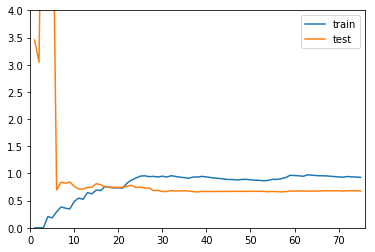

In [55]:
poly2_reg = PolynomialRegression(degree=2)
# 绘制学习曲线
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

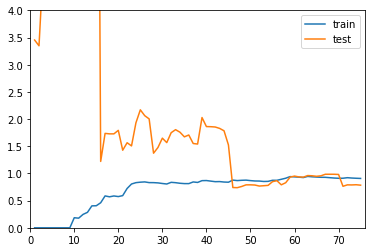

In [54]:
poly2_reg = PolynomialRegression(degree=8)
# 绘制学习曲线
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

[![PR3.png](https://i.postimg.cc/gj25Mm3h/PR3.png)](https://postimg.cc/XGtQqMHN)

[![PR4.png](https://i.postimg.cc/63913tjP/PR4.png)](https://postimg.cc/Jy2QYVW3)